In [96]:
import pandas as pd
import numpy as np
from pyparsing import col
from sqlalchemy import column
import collections 
import matplotlib.pyplot as plt

train_data_dummy = pd.read_csv('train_dummy.csv', low_memory=False)           
train_data = pd.read_csv('train.csv', low_memory=False)           
test_data_dummy = pd.read_csv('test_dummy.csv') 
test_data = pd.read_csv('test.csv') 

Text(0, 0.5, 'Overall Condition')

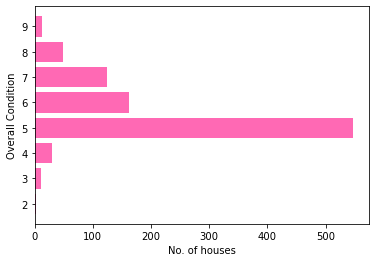

In [97]:
bar_values = train_data['OverallCond'].value_counts().tolist()
bar_keys = train_data['OverallCond'].value_counts().keys().tolist()
plt.barh(bar_keys,bar_values,color = "hotpink")
plt.xlabel("No. of houses")
plt.ylabel("Overall Condition")

Na stlpcovom grafe mozeme vidiet pocet domov danej kvality. Na osi x vidime pocet domov skupinovany po 100. Na osi y vidime kondiciu v akych domy su. Najviac domov ma priemernu/dobru kondiciu, ktoru reprezentuje cislo 5. Ako mozeme vidiet viac domov je lepsej kvality ako horsej. Napriklad domy s hodnotami od 0 po 2 sa ani v nasich datach nenachadzaju. Je viac domov v perfektnej kondicii ako v najhorsej kondicii. 

([<matplotlib.patches.Wedge at 0x14fa98370>,
 [Text(-0.6495343257076722, 0.887752870864116, 'Regular'),
  Text(0.5605781579070731, -0.9464418254058264, 'Slightly irregular'),
  Text(1.1922609559039214, -0.13606547330997623, 'Moderately Irregular'),
  Text(1.2998184910405155, -0.02172303729127707, 'Irregular')])

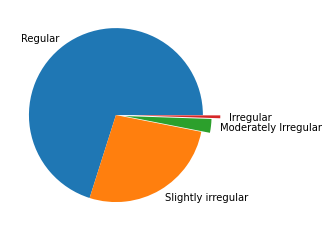

In [98]:
# plt.pie(train_data_dummy['Street_Grvl'].value_counts(),labels=['Gravel','Pave'], explode=[0.1,0])
plt.pie(train_data['LotShape'].value_counts(),labels=['Regular','Slightly irregular','Moderately Irregular','Irregular'], explode=[0,0,0.1,0.2])

Na kolacovom grafe mozeme vidiet pomer zvycajnych a nezvycajnych tvarov domov. Regular su domy, ktory maju obycajny alebo bezny tvar ako je zauzivane. Slightly irregular su domy, ktore maju jemne upravy ale celkovo neposobia nezvycajne. Moderately irregular su domy, ktore maju moderny dizajn a zaroven aj moderny tvar, ktory nie je moc zauzivany. Irregular su domy, ktore maju vyrazne nezvycajny tvar, ktore mozu byt ciastocne aj umeleckym dielom. Ako mozeme vidiet drtiva vacsina domov, cca 70% v databaze ma bezny tvar. Necela stvrtina ma jemne upravy tvarov. Mala cast domov ma znacne upraveny vzhlad a zlomok domov ma nezvycajny tvar.

Text(0, 0.5, 'No. of houses built')

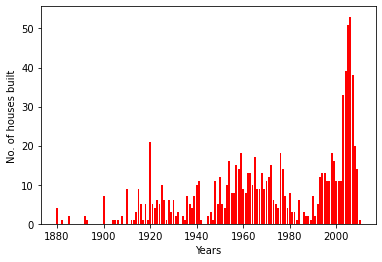

In [99]:
bar2_values = train_data['YearBuilt'].value_counts().tolist()
bar2_keys = train_data['YearBuilt'].value_counts().keys().tolist()
plt.bar(bar2_keys,bar2_values,color = "red")

plt.xlabel("Years")
plt.ylabel("No. of houses built")

Na grafe mozeme vidiet pocet domov postavenych pocas poslednych 140 rokov. Na osi x vidime roky, ktore su skupinovane po 20 rociach. Na ose y vidime pocet domov postavenych za dany rok. Celkovy pocet domov v nasej databaze je 940. Ako mozeme vidiet najvacsi pocet domov bolo postavenych medzi rokmi 1990 az do roku 2010. Data obsahuju aj domy starsie vyse 100 rokov, ale tych je velmi male mnozstvo.

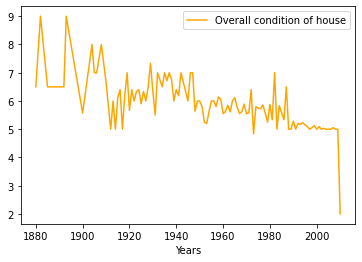

In [100]:
group2 = train_data[['YearBuilt','OverallCond']].groupby(['YearBuilt'])

plt.plot(group2['YearBuilt'].mean(), group2['OverallCond'].mean(),color='orange', label='Overall condition of house')
plt.xlabel("Years") 
plt.legend()

Na nasledujucom grafe moze vidiet priemernu kvalitu domov za dany rok. Na ose x su uvedenen roky zgrupovane po 2 dekadach. Na ose y mozeme vidiet clekovo kvalitu ktore sa pohybuje medzi 0-9 (0 najhorsie, 9 najlepsia). Ako prve by som podotkol, ze v databaze sa nenachadzaju takmer ziadne domy s kvalitou mensou ako 2. Zvlastne na tomto grafe je, ze domy starsie nez storocie maju v priemere lepsiu kvalitu ako domy postavenen v 21. storoci. Na jednej strane domov, ktore boli postavene v tom roku a zaroven sa nachadzaju v nansej databaze je velmi malo. Na druhej strane mozeme poukazat na nekvalitne stavby v 21. storoci. Vsetko sa robi co najrychlejsie a najlacnejsie a kvalita domov takto vyrazne klesa.

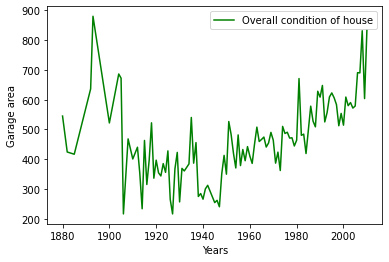

In [101]:
group2 = train_data[['YearBuilt','GarageArea']].groupby(['YearBuilt'])

plt.plot(group2['YearBuilt'].mean(), group2['GarageArea'].mean(),color='green', label='Mean garage area in certain year')
plt.xlabel("Years") 
plt.ylabel("Garage area") 
plt.legend()

Na grafe mozeme vidiet priemernu vekost, v metroch stvorcovych, pre dom v danych rokoch. Na osi x zobrazujeme roky a na osi y zobrazujeme velkost garaze. V roku 1890 mozeme vidiet vysoku krivku, a to z dovodu, ze v tomto roku sa nachadza zlomkove mnozstvo domov. POukazal by som na rast od roku 1950. Postupom do sucasnosti sa zvysuje pocet aut na cestach a taktiez v garaziach. Rodiny mavaju 2 az 3 auta cize logicky sa velkost garaze zvacsuje.